In [431]:
#load and visualize the data
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
#Data Pipline
from sklearn.pipeline import Pipeline

#Data Transform
from sklearn.preprocessing import MinMaxScaler

#Model Selection
from sklearn.model_selection import train_test_split,GridSearchCV

#ML models
from sklearn.linear_model import LogisticRegression,SGDRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn.cluster import KMeans

In [318]:
df.shape

(768, 9)

In [319]:
#Descriptive statistics:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [320]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [321]:
#use Linear Regression (OLS closed form solution):
#LR_model = LinearRegression()


In [322]:
#Check the Count of all people who have high blood pressure and the people who does not have high blood pressure:

print(df['BloodPressure'].value_counts())

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
82     30
66     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
96      4
44      4
110     3
106     3
100     3
98      3
108     2
104     2
46      2
55      2
30      2
95      1
61      1
102     1
38      1
40      1
24      1
114     1
122     1
Name: BloodPressure, dtype: int64


<AxesSubplot:xlabel='Age', ylabel='Count'>

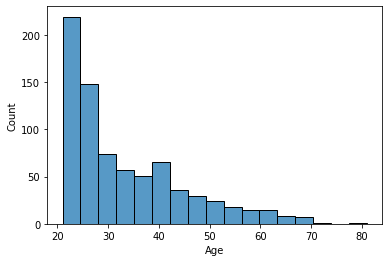

In [323]:
# Data visualizations:
sns.histplot(df['Age'])

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

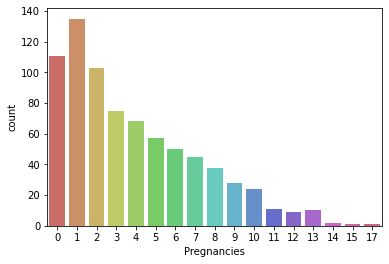

In [324]:
# Data visualizations:
sns.countplot(x='Pregnancies',data=df ,palette='hls')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

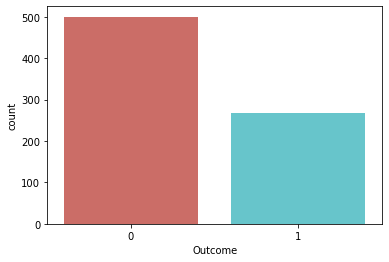

In [325]:
sns.countplot(x='Outcome',data=df , palette='hls')

In [326]:
pipeline = Pipeline([
    ("fill_nan_values", SimpleImputer()),
    ("ML_model", LinearRegression())
])

In [327]:
#check the null values 
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [328]:
#Feature Selection

In [329]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [330]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [331]:
#Logistic Regression Pipline

In [332]:
LR_pipline=Pipeline([
    ("scaler", MinMaxScaler()), #transformer
    ("model", LogisticRegression()) #estimator
])

In [333]:
#Train the model

In [334]:
LR_pipline.fit(x_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

In [335]:
#prediction

In [336]:
#predict testing data
LR_y_pred = LR_pipline.predict(x_test)

In [337]:
#Model Evaluation

In [338]:
LR_accuracy=accuracy_score(y_test,LR_y_pred)
LR_accuracy

0.8008658008658008

In [385]:
target=['No Diabetes', 'Has Diabetes']
LR_CR=classification_report(y_test,LR_y_pred,target_names=target)
print(LR_CR)

              precision    recall  f1-score   support

 No Diabetes       0.81      0.92      0.86       154
Has Diabetes       0.78      0.56      0.65        77

    accuracy                           0.80       231
   macro avg       0.79      0.74      0.76       231
weighted avg       0.80      0.80      0.79       231



In [340]:
#Decision Trees Pipline

In [341]:
DT_pipline=Pipeline([
    ("scaler", MinMaxScaler()), #transformer
    ("model", tree.DecisionTreeClassifier()) #estimator
])

In [342]:
#Train the model

In [343]:
DT_pipline.fit(x_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', DecisionTreeClassifier())])

In [344]:
#prediction

In [345]:
DT_y_pred=DT_pipline.predict(x_test)

In [346]:
#Model Evaluation

In [347]:
#calculate the accuaracy
DT_accuracy=accuracy_score(y_test,DT_y_pred)
DT_accuracy

0.7056277056277056

In [386]:
#Classification report
DT_CR=classification_report(y_test,DT_y_pred,target_names=target)
print(DT_CR)

              precision    recall  f1-score   support

 No Diabetes       0.79      0.76      0.77       154
Has Diabetes       0.55      0.60      0.57        77

    accuracy                           0.71       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.71      0.71       231



In [349]:
#Visualize the Tree

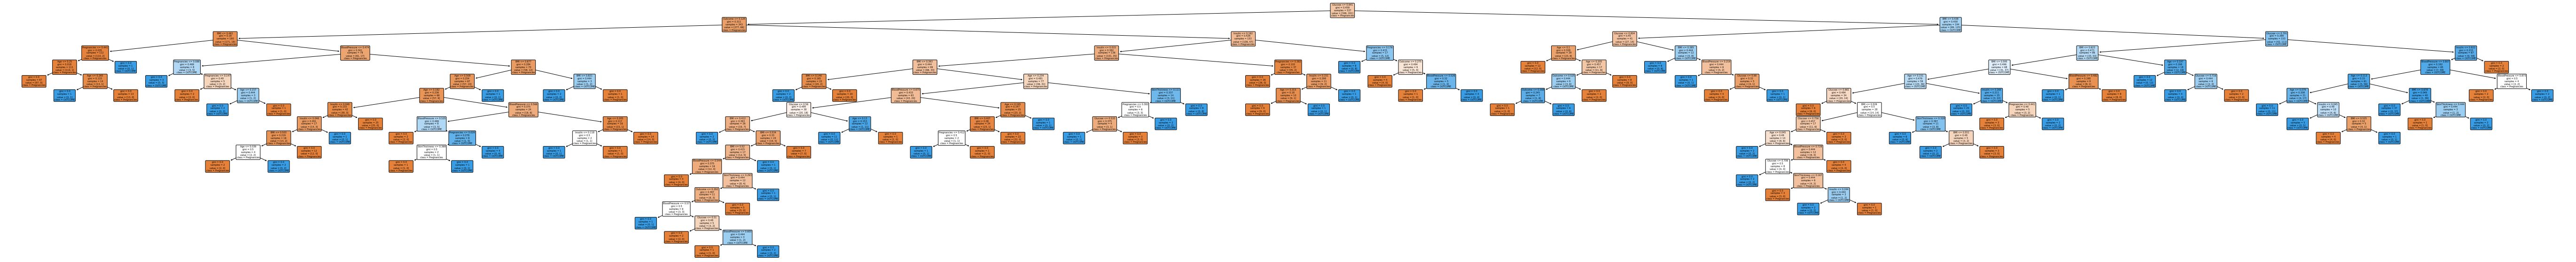

In [350]:
plt.figure(figsize=(98,10))
feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','Outcome']
tree.plot_tree(DT_pipline.named_steps['model'],feature_names=feature_names,class_names=target,filled=True,rounded=True)
plt.show()

In [351]:
#Ensembles
#voting

In [352]:
logs = LogisticRegression()
dt = DecisionTreeClassifier()

In [370]:
from sklearn.ensemble import VotingClassifier
pipV=Pipeline([
    ("scaler", MinMaxScaler()), #transformer
    ("model", VotingClassifier(
estimators=[('lr', logs),('dt',dt)],
voting='hard')) #estimator
])

In [371]:
#voting_clf.fit(('x_train'), ('y_train'))
array_x=np.array(x_train)
array_y=np.array(y_train)

In [372]:
pipV.fit(x_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 VotingClassifier(estimators=[('lr', LogisticRegression()),
                                              ('dt',
                                               DecisionTreeClassifier())]))])

In [373]:
V_y_pred=pipV.predict(x_test)

In [374]:
V_accuracy=accuracy_score(y_test,V_y_pred)
V_accuracy

0.7748917748917749

In [377]:
Knn=KNeighborsClassifier()

In [379]:
Knn.fit(x_train,y_train)

KNeighborsClassifier()

In [380]:
y_pridict=Knn.predict(x_test)

In [381]:
knn_accuracy=accuracy_score(y_test,y_pridict)
knn_accuracy

0.7272727272727273

In [382]:
data={'Logistic Regression':[LR_accuracy],'Decision Tree':[DT_accuracy],'Voting Classifier':[V_accuracy],'KNN':[knn_accuracy]}

In [384]:
result=pd.DataFrame(data)
result.index=['accuracy']
result

,Logistic Regression,Decision Tree,Voting Classifier,KNN
accuracy,0.800866,0.705628,0.774892,0.727273


In [ ]:
#Feature Selection

In [427]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = tree.DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(df.drop('Outcome', axis=1), df['Outcome']) 

DecisionTreeClassifier(max_depth=5, random_state=42)

In [428]:
for i in zip(df, tree_clf.feature_importances_):
    print(i)

('Pregnancies', 0.011211235875717564)
('Glucose', 0.4907106107791432)
('BloodPressure', 0.04169142045278744)
('SkinThickness', 0.0)
('Insulin', 0.03106604019488539)
('BMI', 0.22051933826971748)
('DiabetesPedigreeFunction', 0.06767919376257207)
('Age', 0.13712216066517693)


In [438]:
svc_pipline= Pipeline([
    ("standardscaler", standardscaler()), #transformer
    ("SVC", SVC()) #estimator
])

NameError: name 'standardscaler' is not defined

In [439]:
svc_pipline.fit(x_train,y_train)

NameError: name 'svc_pipline' is not defined

In [ ]:
svc_y_pred=svc_pipline.predict(x_test)

In [ ]:
#calculate the accuaracy
svc_accuracy=accuracy_score(y_test,svc_y_pred)
svc_accuracy